In [1]:
# Import

#General
import numpy as np
import itertools

# System
import os,fnmatch
import subprocess

# Visualization
# import seaborn #visualization library, must be imported before all other plotting libreries
import matplotlib.pyplot as plt
from IPython.core.display import HTML, display

# Machine Learning
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report

# Random Seed
from numpy.random import seed
seed(1)

# Audio 
import librosa.display, librosa


# unorgonized:
import librosa
import numpy as np
import IPython.display as ipd
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import librosa, librosa.display
import IPython as ip
import IPython.display as ipd
import wave
import scipy.signal as sig
import scipy.io as wavfile
from python_speech_features import mfcc, logfbank
from tqdm import tqdm

import pandas as pd
import decimal
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, log_loss, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import warnings
warnings.filterwarnings('ignore')

import os
from pathlib import Path
import os
import numpy as np
from scipy.io import wavfile
from tqdm import tqdm
import librosa.display, librosa

# Configurations
path= r"audio"


C:\Users\shushu\AppData\Local\Temp\ipykernel_20736\1984826315.py:14: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import HTML, display


Global functions

In [2]:
# Functions : compare_arrays ; binary_encoding ; ones_count ; normalize ; scatter_plot ; cm_plot ; roc_plot
def compare_arrays(a, b):
        result = []
        loss = 0
        for i in a:
                for j in b:
                        if decimal.Decimal(str(i)).quantize(decimal.Decimal('0.01')) == decimal.Decimal(str(j)).quantize(decimal.Decimal('0.01')):
                                if row not in result:
                                        loss += 1
                                        result.append(round(i, 3))
                                        break
        return sorted(set(result)), loss

#test
# a = [1, 2, 3, 4.56, 5.567, 6.874433]
# b = [6, 7, 8, 4.53, 2, 5.568, 6.873343345]
# print(compare_arrays(a, b))  # Output: [5.56, 6.87]


def binary_encoding(X,y):
    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)

    ### Sandardization of data ###
    ### We does not standardize the Target variable for classification
    PredictorScaler=StandardScaler()
    
    # Storing the fit object for later reference
    PredictorScalerFit=PredictorScaler.fit(X)
    
    # Generating the standardized values of X and y
    X = PredictorScalerFit.transform(X)
    return X, y


def ones_count(y):
    count = 0
    for i in y:
        if i == 1:
            count += 1
    return count

def count_objects(lst):
    counts = {}
    for item in lst:
        if item in counts:
            counts[item] += 1
        else:
            counts[item] = 1
    return counts

def normalize(arr):
    old_min = np.min(arr)
    old_max = np.max(arr)
    new_min = 0
    new_max = 1
    new_arr = ((arr - old_min) / (old_max - old_min)) * (new_max - new_min) + new_min
    return new_arr

def scatter_plot(X, y, k = 1, rows = 7, cols = 7):
    fig, axs = plt.subplots(rows, cols, figsize=(20, 20))
    for i in range(rows):
        for j in range(cols):
            # if (i != j):
            plt.subplot(rows, cols, k)
            plt.scatter(X[:,i], X[:,j], c = y)
            plt.title(f"staete: {i,j}", fontsize=6)
            plt.xlabel(f'Feature {i}', fontsize=6)
            plt.ylabel(f'Feature {j}', fontsize=6)

                # if (j == 7):
                #     k += i +1
                # else:
            k += 1
            
    plt.show()


def cm_plot(models, x, y, axs):
    for i, ax in enumerate(axs.flat):
        if i < len(models):
            name, model = models[i]
            model_cm = confusion_matrix(y, model.predict(x))
            ax.imshow(model_cm)
            ax.grid(False)
            ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
            ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
            ax.set_ylim(1.5, -0.5)
            for i in range(2):
                for j in range(2):
                    ax.text(j, i, model_cm[i, j], ha='center', va='center', color='red')
            ax.set_title(name)
        else:
            ax.set_axis_off()
    plt.show()

def roc_plot(models, X_test, y_test):
    fig, ax = plt.subplots(figsize=(7, 7))
    
    for name, model in models:
        y_pred = model.predict(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        ax.plot(fpr, tpr, label=name)

    ax.set_title("Receiver Operating Characteristics for different models")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend()
    
    plt.show()


# Clean

In [3]:
print(f'Working from \n     {os.getcwd()} \nenviroment')

def check_dir(save_dir):
    if os.path.exists(save_dir) is False:
        os.makedirs(save_dir)

# To use this : you need to create a foldr insid the audio folder,
# varibles the classificetion and path
# Set the category and time end folder names
category = 'frog'
# from: 
t_start = 'mp3'
# to:
t_end = 'wav'
# Set the path to the directory containing the audio files
path = Path(os.path.join(os.getcwd(), "audio", category))
print(f"convert from {path}")


list_dir = os.listdir(path)
print(list_dir)

fs = 44100         # Sampling Frequency

Working from 
     c:\Users\shushu\Desktop\Sorona_Wave 
enviroment
convert from c:\Users\shushu\Desktop\Sorona_Wave\audio\frog
['test', 'train']


In [4]:
# Webn to wav
# # The audio files are in the .webm format and the config data is in the JSON format.
# # pytorch need the files to be .wav
# # converting the file formats without corrupting them is a nightmare
# # ffmpeg (command line tool) uses to convert audio and video formats (useful for modifying datasets) 

webm = list(path.glob('**/*.webm'))

if webm:
    print('yes')
# convert webm -> wav
    for pod in webm:
        pod = str(pod)
        name = pod.split('.')[0]
        webm_path = os.path.join(path, category, t_start, pod)
        wav_path = os.path.join(path, category, t_end, name + f'.{t_end}')

        if os.path.exists(wav_path) is False:
            os.system(f'ffmpeg -i "{webm_path}" -vn -acodec pcm_s16le -ac 1 -ar 44100 -f wav "{wav_path}"')

    print("Conversion completed.")

# # Another way
# path='..\\public_dataset'
# for file in os.listdir(path):
#     if file.endswith('webm'):
#         print(os.path.join(path,file))
#         print('..\\wavfiles\\cough\\'+file[:-5]+'.wav')
#         subprocess.run(['ffmpeg','-i',os.path.join(path,file),'..\\wavfiles\\cough\\'+file[:-5]+'.wav'])

In [5]:
# MP3 to wav
# # The audio files are in the .mp3 format
# # pytorch need the files to be .wav
# # ffmpeg (command line tool) uses to convert audio and video formats (useful for modifying datasets) 
mp3 = list(path.glob('**/*.mp3'))

if mp3:
    print('yes')
# convert mp3 -> wav
    for pod in mp3:
        pod = str(pod)
        name = pod.split('.')[0]
        mp3_path = os.path.join(path, category, t_start, pod)
        wav_path = os.path.join(path, category, t_end, name + f'.{t_end}')

        if os.path.exists(wav_path) is False:
            os.system(f'ffmpeg -i "{mp3_path}" -vn -acodec pcm_s16le -ac 1 -ar 44100 -f wav "{wav_path}"')

    print("Conversion completed.")

# # Another way
# def convert_mp3_to_wav(root_folder):
#     # Iterate over all subfolders and files in the root_folder
#     for foldername, subfolders, filenames in os.walk(root_folder):
#         # Iterate over all files in the current subfolder
#         for filename in filenames:
#             # Check if the file extension is '.mp3'
#             if filename.endswith('.mp3'):
#                 # Construct the paths to the input and output files
#                 input_file_path = os.path.join(foldername, filename)
#                 output_file_path = os.path.join(foldername, filename[:-4] + '.wav')
#                 # Create the output folder if it does not exist
#                 os.makedirs(os.path.dirname(output_file_path), exist_ok=True)
#                 # Convert the file using ffmpeg
#                 subprocess.run(['ffmpeg', '-y', '-nostdin', '-i', input_file_path, output_file_path])
#                 # print(f'Converted {input_file_path} to {output_file_path}')

# convert_mp3_to_wav(path)

   
# remove mp3
path = Path('audio')
mp3 = list(path.glob('**/*.mp3'))

for item in mp3:
    if str(item)[-1] == '3':
        item.unlink()

path = Path('audio')
mp3 = list(path.glob('**/*.mp3'))
print(mp3)

[]


In [66]:
# # TODO: Permission to the folder denied
# # Read the names of all the files in the specified directory
# objects = sorted(os.listdir(path))

# # Set the length of the audio segments in seconds
# segment_length = 3

# for fn in tqdm(objects):
#     file_path = os.path.join(path, fn)
#     signal, sr = librosa.load(file_path, sr=fs)
#     yt, index = librosa.effects.trim(signal,top_db=60) #Trim
#     duration = librosa.get_duration(yt, sr=fs)
    
#     if duration < segment_length:
#         # delite the file
#         pass

#     if duration > segment_length:  
#         print(f'\n{fn}\n')
#         wav_path = os.path.join(str(path), fn)
#         print(f"wav_path is {wav_path}")

#         rate, wav = wavfile.read(wav_path)
#         print(rate, np.shape(wav))

#         # Determine the number of segments in the audio file
#         num_segments = int(np.ceil(wav.shape[0] / (rate * segment_length)))

#         for i in range(num_segments):
#             start = i * rate * segment_length
#             end = min((i + 1) * rate * segment_length, wav.shape[0])
#             segment = wav[start:end]
#             save_dir = os.path.join(str(path), 'data')
#             os.makedirs(save_dir, exist_ok=True)

#             fn_without_extension = os.path.splitext(fn)[0]
#             save_fn = os.path.join(save_dir, f"{fn_without_extension}_{i}.wav")
#             if os.path.exists(save_fn):
#                 continue
#             wavfile.write(filename=save_fn, rate=rate, data=segment)

  0%|          | 0/3 [00:00<?, ?it/s]


PermissionError: [Errno 13] Permission denied: 'audio\\frog'

# Test

Upload data - Get filenamesa

In [7]:
# Get files in data path
# Import file name from a clsified folder
def read_classified_files(path):
    files = {}
    for root, dirnames, filenames in os.walk(path):
        for filename in fnmatch.filter(filenames, '*.wav'):
            label = os.path.basename(root)
            if label not in files:
                files[label] = []
            files[label].append(os.path.join(root, filename))
    return files

def all_files(path):
    files = []
    for root, dirnames, filenames in os.walk(path):
        for filename in fnmatch.filter(filenames, '*.wav'):
            files.append(os.path.join(root, filename))
    return files


print(f"found {len(all_files(path))} audio files in {path} ")

files = all_files(path)

found 120 audio files in audio 


In [8]:
len(files)

120

In [9]:
# folder_dir = os.path.join(os.getcwd(), "audio\\door_wood_creaks")
# print(folder_dir)
# audio_dir = read_classified_files(folder_dir)['train'][0]
# print(audio_dir)
# ipd.Audio(audio_dir, autoplay=False)


In [10]:
folder_dir = os.path.join(os.getcwd(), "audio")
print(folder_dir)

def count_objects(folder_path):
    object_names = []
    for entry in os.scandir(folder_path):
        if entry.is_dir():
            object_names.append(entry.name)
    return object_names

objects = count_objects(folder_dir)
print(len(objects))


c:\Users\shushu\Desktop\Sorona_Wave\audio
3


In [11]:
# Get labels
labels = []
color_list = []
for filename in files:
    matched = False
    for name in objects:
        if fnmatch.fnmatchcase(filename, '*' + name + '*'):
            labels.append(name)
            matched = True
            break
    if not matched:
        labels.append('other')
labels

# labels = []
# classes = ['cello','cat', 'clarinet', 'cough', 'flute', 'oboe', 'sax', 'trumpet', 'viola', 'drum', 'background']
# color_dict = {'cello' : 'blue',
#               'cat' : 'violet',
#               'clarinet': 'gray',
#               'cough' : 'pink',
#               'flute' : 'red',
#               'oboe' : 'green',
#               'trumpet' : 'black',
#               'sax' : 'magenta',
#               'viola' : 'yellow',
#               'drum' : 'olive',
#               'background' : 'lime'}
# color_list = []
# for filename in files:
#     for name in classes:
#         if fnmatch.fnmatchcase(filename, '*'+name+'*'):
#             labels.append(name)
#             color_list.append(color_dict[name])
#             break
#         # else:
#         #     labels.append('other')
# labels

['frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'frog',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'hen',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig',
 'pig']

min 4:41
https://www.youtube.com/watch?v=p_IU6uRqHvE&list=PL6QnpHKwdPYg2MzpQZIxpT1Qg51kquJty

In [12]:
# Encode Labels
labelencoder = LabelEncoder()
labelencoder.fit(labels)
print(len(labelencoder.classes_), "classes:", ", ".join(list(labelencoder.classes_)))
classes_num = labelencoder.transform(labels)


3 classes: frog, hen, pig


In [13]:
from collections import Counter

def count_occurrences(lst):
    counts = Counter(lst)
    return dict(counts)

count = count_occurrences(labels)
print(count)

{'frog': 40, 'hen': 40, 'pig': 40}


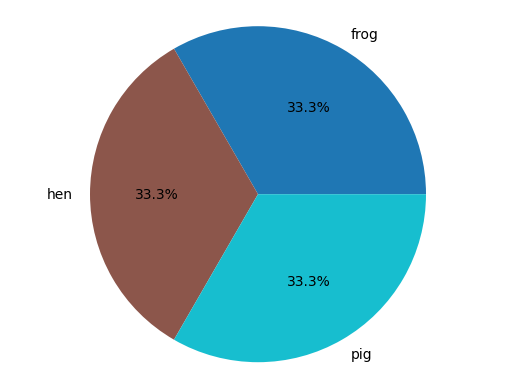

In [14]:
#______________pi_distrubution_____________________

import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot_pie_chart(data):
    labels = data.keys()
    sizes = data.values()

    num_slices = len(data)
    colors = iter(cm.tab10(np.linspace(0, 1, num_slices)))

    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()


plot_pie_chart(count)

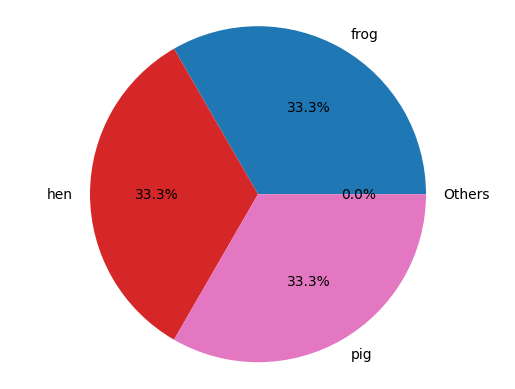

In [15]:
#______________pi_distrubution up to 1%_____________________
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def plot_pie_chart(data):
    labels = data.keys()
    sizes = list(data.values())

    total = sum(sizes)
    threshold = total * 0.01  # 1% threshold

    # Filter out the slices that are less than the threshold
    filtered_data = {k: v for k, v in data.items() if v >= threshold}

    # Combine the slices below the threshold into a single "Others" category
    others_count = sum(v for v in data.values() if v < threshold)
    filtered_data['Others'] = others_count

    filtered_labels = filtered_data.keys()
    filtered_sizes = filtered_data.values()

    num_slices = len(filtered_data)
    colors = iter(cm.tab10(np.linspace(0, 1, num_slices)))

    plt.pie(filtered_sizes, labels=filtered_labels, colors=colors, autopct='%1.1f%%')
    plt.axis('equal')
    plt.show()

    if others_count > 0:
        print("Classes in Others category:")
        for label, count in data.items():
            if count < threshold:
                print(label)

plot_pie_chart(count)

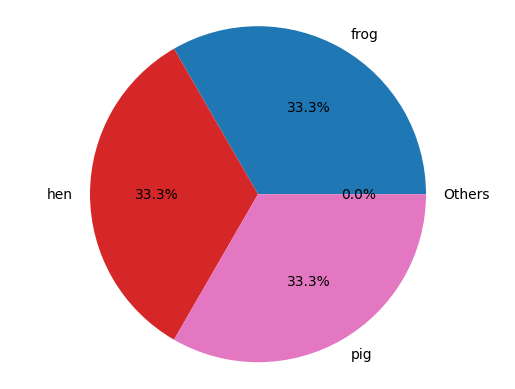

In [16]:
#______________pi_distrubution in the 1%_____________________
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

def plot_pie_chart(data, title=None):
    labels = data.keys()
    sizes = list(data.values())

    total = sum(sizes)
    threshold = total * 0.01  # 1% threshold

    # Filter out the slices that are less than the threshold
    filtered_data = {k: v for k, v in data.items() if v >= threshold}

    # Combine the slices below the threshold into a single "Others" category
    others_count = sum(v for v in data.values() if v < threshold)
    filtered_data['Others'] = others_count

    filtered_labels = filtered_data.keys()
    filtered_sizes = filtered_data.values()

    num_slices = len(filtered_data)
    colors = iter(cm.tab10(np.linspace(0, 1, num_slices)))

    plt.pie(filtered_sizes, labels=filtered_labels, colors=colors, autopct='%1.1f%%')
    plt.axis('equal')
    plt.title(title)  # Set the chart title
    plt.show()

    if others_count > 0:
        others_data = {k: v for k, v in data.items() if v < threshold}
        plot_pie_chart(others_data, title='Others')



plot_pie_chart(count)

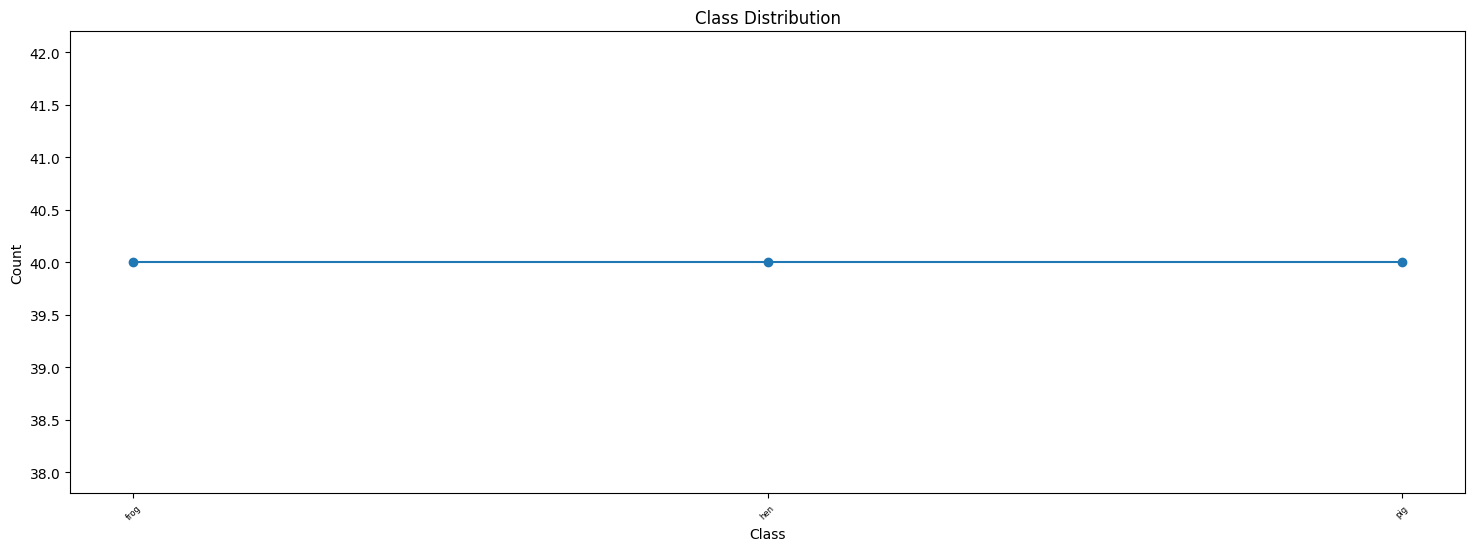

In [17]:
import matplotlib.pyplot as plt

def plot_line_chart(data):
    labels = list(data.keys())
    counts = list(data.values())

    plt.figure(figsize=(18, 6))
    plt.plot(labels, counts, marker='o')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Distribution')
    plt.xticks(rotation=45, fontsize=6)  # Adjust the fontsize for x-axis labels
    plt.show()



plot_line_chart(count)

*Cleaning Data*

In [18]:
# y = y_clean
# X = X_clean

Prepering Data


Parameters for MFCC

In [19]:
# Parameters
# Signal Processing Parameters
fs = 44100         # Sampling Frequency
n_fft = 2048       # length of the FFT window
hop_length = 512   # Number of samples between successive frames
n_mels = 128       # Number of Mel bands
n_mfcc = 13        # Number of MFCCs

# Machine Learning Parameters
testset_size = 0.25 #Percentage of data for Testing
n_neighbors=1       # Number of neighbors for kNN Classifier


Function to Calculate Audio Features: MFCC

In [20]:
# Define Function to Calculate MFCC, Delta_MFCC and Delta2_MFCC
def get_features(signal, sr = 44100):
    S = librosa.feature.melspectrogram(y= signal, sr=sr, n_mels=n_mels)
    mfcc = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=n_mfcc)
    feature_vector = np.mean(mfcc,1)
    feature_vector = (feature_vector-np.mean(feature_vector))/np.std(feature_vector)
    return feature_vector


In [21]:
files

['audio\\frog\\test\\1-18755-B-4.wav',
 'audio\\frog\\test\\1-31836-A-4.wav',
 'audio\\frog\\test\\2-32515-A-4.wav',
 'audio\\frog\\test\\2-32515-B-4.wav',
 'audio\\frog\\test\\2-32515-C-4.wav',
 'audio\\frog\\test\\2-32834-A-4.wav',
 'audio\\frog\\test\\3-70962-C-4.wav',
 'audio\\frog\\test\\4-130584-A-4.wav',
 'audio\\frog\\test\\4-154793-A-4.wav',
 'audio\\frog\\test\\4-99644-B-4.wav',
 'audio\\frog\\test\\4-99644-C-4.wav',
 'audio\\frog\\test\\5-187201-B-4.wav',
 'audio\\frog\\test\\5-189795-A-4.wav',
 'audio\\frog\\test\\5-237499-A-4.wav',
 'audio\\frog\\train\\1-15689-A-4.wav',
 'audio\\frog\\train\\1-15689-B-4.wav',
 'audio\\frog\\train\\1-17970-A-4.wav',
 'audio\\frog\\train\\1-18755-A-4.wav',
 'audio\\frog\\train\\1-18757-A-4.wav',
 'audio\\frog\\train\\1-31836-B-4.wav',
 'audio\\frog\\train\\2-32515-D-4.wav',
 'audio\\frog\\train\\2-52085-A-4.wav',
 'audio\\frog\\train\\2-52085-B-4.wav',
 'audio\\frog\\train\\2-52789-A-4.wav',
 'audio\\frog\\train\\3-102908-A-4.wav',
 'audio\


Load audio files, calculate features and create feature vectors

In [22]:
# Load audio files, calculate features and create feature vectors
feature_vectors = []
sound_paths = []
duration = []

for i,f in enumerate(files):
    if (i % 100 == 0):
        print(f"get {i+1} of {len(files)} = {f}")
    try:
        signal, sr = librosa.load(f, sr=fs)
        yt, index = librosa.effects.trim(signal,top_db=60) #Trim
        duration.append(librosa.get_duration(yt, sr=fs))

        signal/=signal.max() #Normalize
        if len(signal) < 2:
            print("Error loading %s" % f)
            continue
        feat = get_features(signal, sr)
        feature_vectors.append(feat)
        sound_paths.append(f)
    except Exception as e:
        print("Error loading %s. Error: %s" % (f,e))
        
print("Calculated %d feature vectors"%len(feature_vectors))


get 1 of 120 = audio\frog\test\1-18755-B-4.wav
get 101 of 120 = audio\pig\train\2-158746-A-2.wav
Calculated 120 feature vectors


In [23]:
print("Max. Duration:", max(duration))
print("Min. Duration:", min(duration))
print("Average Duration:", np.mean(duration))

Max. Duration: 5.0
Min. Duration: 0.4179591836734694
Average Duration: 4.694048374905519


Duration average: 4.694048374905519


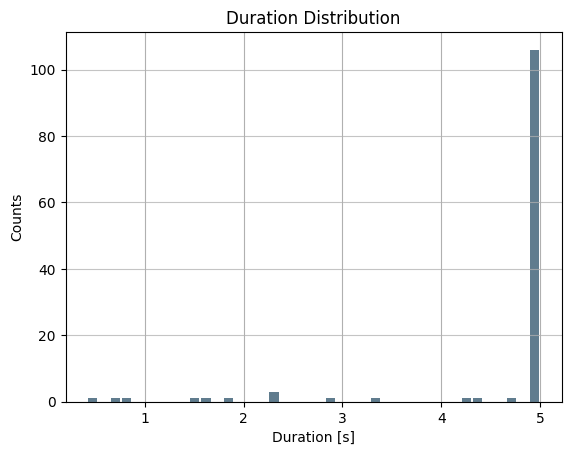

In [24]:
durationDist = pd.Series(np.array(duration))
plt.figure()
durationDist.plot.hist(grid=True, bins=40, rwidth=0.8,
                   color='#607c8e')
plt.title('Duration Distribution')
plt.xlabel('Duration [s]')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)
# plt.xlim(0, 11)
print("Duration average:",np.mean(duration))

Spectogram Array Shape: (1025, 87)


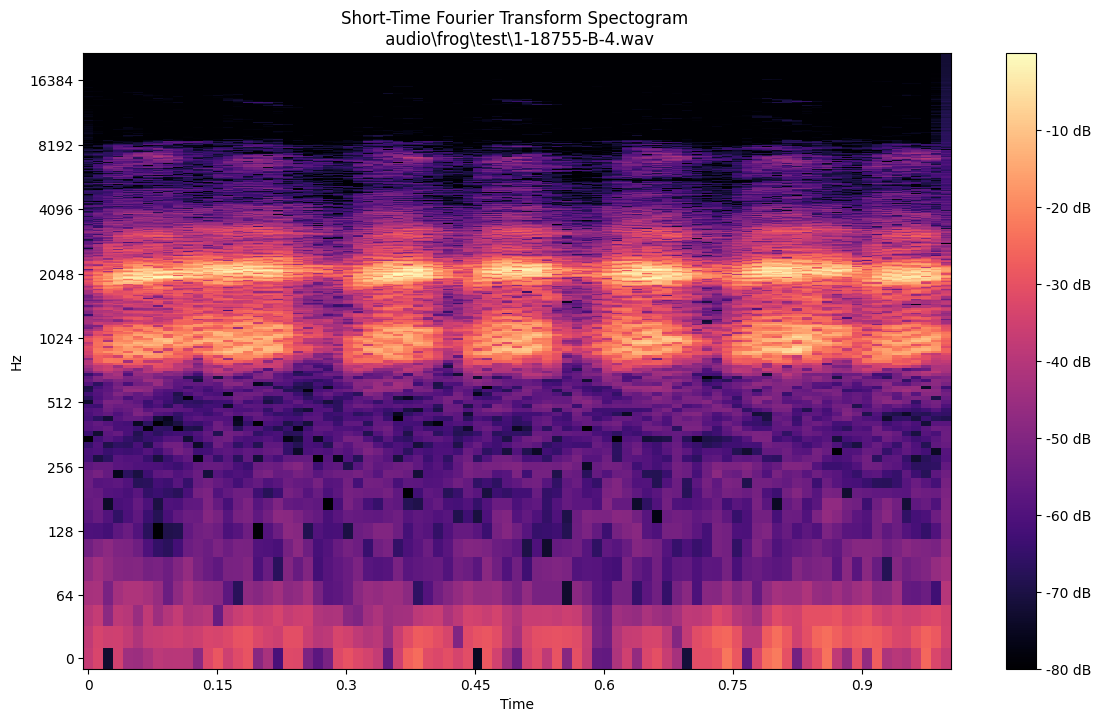

In [25]:
# STFT Example
y, sr = librosa.load(files[10], sr=fs, duration=1)
y/=y.max() #Normalize
duration_in_samples=librosa.time_to_samples(1, sr=fs)
y_pad = librosa.util.fix_length(y, duration_in_samples) #Pad to 1s if smaller
y_stft=librosa.core.stft(y_pad, n_fft=n_fft, hop_length=hop_length)
y_spec=librosa.amplitude_to_db(abs(y_stft), np.max)
plt.figure(figsize=(14,8))
plt.title("Short-Time Fourier Transform Spectogram \n %s"%files[0])
librosa.display.specshow(y_spec,sr=fs,y_axis='log', x_axis='time')
plt.colorbar(format='%+2.0f dB')
print("Spectogram Array Shape:",y_spec.shape)
ipd.Audio(y, rate=fs)

In [26]:
# Scale features using Standard Scaler
scaler = StandardScaler()
scaled_feature_vectors = scaler.fit_transform(np.array(feature_vectors))
print("Feature vectors shape:",scaled_feature_vectors.shape)

Feature vectors shape: (120, 13)


Process

In [27]:
# Binary encoding of labels
X_binary, y_binary = binary_encoding(feature_vectors,labels)

print(f"binary val: {y_binary}")
print(np.shape(y_binary))

binary val: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2]
(120,)


In [28]:
#normalize X (no need for y cues it [0,1])
X_normelize = normalize(X_binary)
y_normelize = normalize(y_binary)

print(f"normalize val: {X_normelize}")

normalize val: [[0.62854887 0.64900788 0.35776291 ... 0.59213595 0.39713085 0.48616884]
 [0.51493515 0.55716066 0.45149718 ... 0.30264512 0.44580748 0.31169188]
 [0.55058575 0.46355108 0.26694712 ... 0.56206894 0.29997568 0.4411039 ]
 ...
 [0.31116692 0.1701355  0.67144713 ... 0.69585892 0.69177316 0.70363426]
 [0.31065734 0.16844385 0.69032784 ... 0.67260964 0.67310718 0.69637633]
 [0.55202374 0.59828505 0.53778784 ... 0.38219837 0.36990333 0.35084068]]


In [29]:
fetur_shape = np.shape(X_normelize)

In [30]:
# Check if there are feturs depand one another 
# Scatter plot 
# scatter_plot(X_normelize, y_normelize, k = 1, rows = fetur_shape[1], cols = fetur_shape[1])


Train and Test Sets

In [31]:
X_df = pd.DataFrame(X_normelize)
X_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.628549,0.649008,0.357763,0.450033,0.516028,0.534887,0.403208,0.509182,0.500747,0.365041,0.592136,0.397131,0.486169
1,0.514935,0.557161,0.451497,0.453237,0.632316,0.743833,0.520242,0.447543,0.453813,0.614293,0.302645,0.445807,0.311692
2,0.550586,0.463551,0.266947,0.247303,0.644890,0.768841,0.647337,0.714875,0.844376,0.758482,0.562069,0.299976,0.441104
3,0.506305,0.571195,0.586051,0.521717,0.577630,0.660751,0.400440,0.326959,0.522790,0.604062,0.374015,0.097856,0.202162
4,0.503411,0.532312,0.440530,0.363167,0.612200,0.721986,0.592925,0.479922,0.684676,0.658983,0.457934,0.186824,0.325603
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.590396,0.656487,0.501773,0.494146,0.433449,0.415923,0.509448,0.318781,0.438484,0.354072,0.404168,0.442248,0.568099
116,0.334892,0.310196,0.661653,0.553996,0.592057,0.526739,0.624574,0.550036,0.541271,0.500238,0.599918,0.631290,0.664540
117,0.311167,0.170136,0.671447,0.550151,0.641894,0.573385,0.709663,0.574014,0.598205,0.595420,0.695859,0.691773,0.703634
118,0.310657,0.168444,0.690328,0.538678,0.654187,0.560218,0.694836,0.575054,0.615070,0.597887,0.672610,0.673107,0.696376


In [32]:
y_df = pd.Series(y_binary)
y_df

0      0
1      0
2      0
3      0
4      0
      ..
115    2
116    2
117    2
118    2
119    2
Length: 120, dtype: int32

In [33]:
# Create Train and Test Set
# train-cross_validation_set split: Hold out the cross_validation_set set for final model evaluation
# The meaning of stratify is to go seperet 0,1 equel
# there for shuffle need to be true
# X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, stratify=y_df , train_size=0.7, shuffle=True)

# print(f"X_train: {np.shape(X_train)}, X_test: {np.shape(X_test)}")
# print(f"y_train: {np.shape(y_train)}, y_test: {np.shape(y_test)}")
# Create Train and Test Set
splitter = StratifiedShuffleSplit(n_splits=1, test_size=testset_size, random_state=0)
splits = splitter.split(scaled_feature_vectors, classes_num)

for train_index, test_index in splits:
    train_set = scaled_feature_vectors[train_index]
    test_set = scaled_feature_vectors[test_index]
    train_classes = classes_num[train_index]
    test_classes = classes_num[test_index]

print(f"X_train: {np.shape(train_set)}, X_test: {np.shape(test_set)}")
print(f"y_train: {np.shape(train_classes)}, y_test: {np.shape(test_classes)}")

X_train = train_set
X_test = test_set
y_train = train_classes
y_test = test_classes

X_train: (90, 13), X_test: (30, 13)
y_train: (90,), y_test: (30,)


In [34]:
# Check Set Shapes
print("train_set shape:",train_set.shape)
print("test_set shape:",test_set.shape)
print("train_classes shape:",train_classes.shape)
print("test_classes shape:",test_classes.shape)

train_set shape: (90, 13)
test_set shape: (30, 13)
train_classes shape: (90,)
test_classes shape: (30,)


In [35]:
 
n_neighbors=1  # KNN Classifier


# Models : KNN Classifier ; Logistic Regression ; Linear Discriminant Analysis ; Decision Tree ; Random Forest ; NN ; Ada Boost 
KNN = KNeighborsClassifier(n_neighbors=n_neighbors)
LR = LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=100, random_state=42)
LD = LinearDiscriminantAnalysis()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier(n_estimators=100, random_state=42)
NN = MLPClassifier(hidden_layer_sizes=(15,), random_state=42, max_iter=100, warm_start=True)
AB = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=42, algorithm='SAMME') #we train 10 model

# # more models:
# model_svm = LinearSVC(random_state=0, tol=1e-5, max_iter=5000)
# svclassifier = SVC(kernel='rbf', C = 10.0, gamma=0.1) 

In [36]:
print(type(X_train))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [37]:
from sklearn import utils
utils.multiclass.type_of_target(y_train)

'multiclass'

In [38]:
# Train models original data
# prepare models

LR.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

# Train models process data
# prepare models

In [39]:
models_p = []

In [40]:
models_p.append(('KNN', KNN.fit(X_train, y_train)))

In [41]:
models_p.append(('LR', LR.fit(X_train, y_train)))

In [42]:
models_p.append(('LR', LR.fit(X_train, y_train)))

In [43]:
models_p.append(('LD', LD.fit(X_train, y_train)))

In [44]:
models_p.append(('DT', DT.fit(X_train, y_train)))

In [45]:
models_p.append(('RF', RF.fit(X_train, y_train)))

In [46]:
models_p.append(('NN', NN.fit(X_train, y_train)))

In [47]:
models_p.append(('AdaBoost', AB.fit(X_train, y_train)))

# COptimizer
# prepare models

In [48]:
models_OvR = []

In [49]:
models_OvR.append(('KNN', OneVsRestClassifier(KNN).fit(X_train, y_train)))

In [50]:
models_OvR.append(('LR', OneVsRestClassifier(LR).fit(X_train, y_train)))

In [51]:
models_OvR.append(('LD', OneVsRestClassifier(LD).fit(X_train, y_train)))

In [52]:
models_OvR.append(('DT', OneVsRestClassifier(DT).fit(X_train, y_train)))

In [53]:
models_OvR.append(('RF', OneVsRestClassifier(RF).fit(X_train, y_train)))

In [54]:
models_OvR.append(('NN', OneVsRestClassifier(NN).fit(X_train, y_train)))

In [55]:
models_OvR.append(('AdaBoost', OneVsRestClassifier(AB).fit(X_train, y_train)))

KNN, cv_results: mean accurecy = 0.8222222222222222, score = 0.13333333333333333
LR, cv_results: mean accurecy = 0.8777777777777779, score = 0.09229582069908972
LR, cv_results: mean accurecy = 0.8777777777777779, score = 0.09229582069908972
LD, cv_results: mean accurecy = 0.8555555555555555, score = 0.1319371343004213
DT, cv_results: mean accurecy = 0.8, score = 0.06666666666666665
RF, cv_results: mean accurecy = 0.8444444444444444, score = 0.10183501544346311
NN, cv_results: mean accurecy = 0.5444444444444445, score = 0.15275252316519466
AdaBoost, cv_results: mean accurecy = 0.8, score = 0.11967032904743338


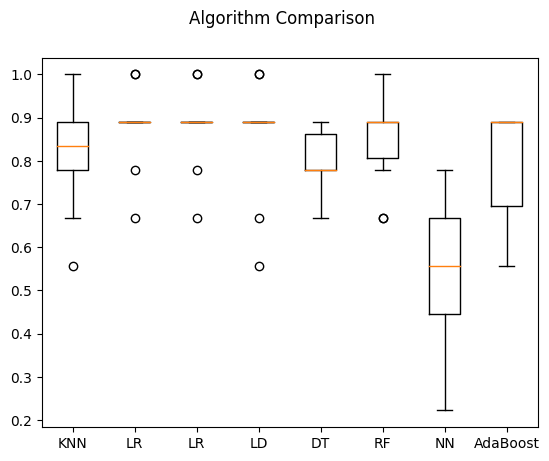

In [56]:
# Compare Algorithms process data
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

# prepare configuration for cross validation test harness
seed = 7

for name, model in models_p:

	# train each model seperetly (10 times)
	kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True) 
	# opional: 
	# sklean.model_selection.StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)

	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)

	results.append(cv_results)
	names.append(name)

	print(f"{name}, cv_results: mean accurecy = {cv_results.mean()}, score = {cv_results.std()}")

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

KNN, cv_results: mean accurecy = 0.8222222222222222, score = 0.13333333333333333
LR, cv_results: mean accurecy = 0.8777777777777779, score = 0.09229582069908972
LD, cv_results: mean accurecy = 0.8555555555555555, score = 0.1319371343004213
DT, cv_results: mean accurecy = 0.7111111111111111, score = 0.15869840952317443
RF, cv_results: mean accurecy = 0.8555555555555555, score = 0.1
NN, cv_results: mean accurecy = 0.7888888888888889, score = 0.12619796324000607
AdaBoost, cv_results: mean accurecy = 0.8444444444444443, score = 0.11331154474650632


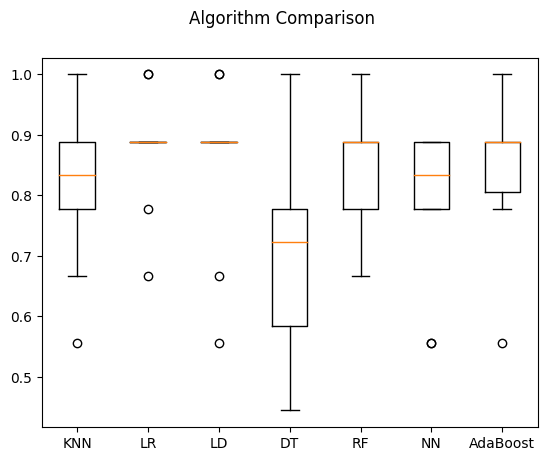

In [57]:
# Compare Algorithms process data
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

# prepare configuration for cross validation test harness
seed = 7

for name, model in models_OvR:

	# train each model seperetly (10 times)
	kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True) 
	# opional: 
	# sklean.model_selection.StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)

	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)

	results.append(cv_results)
	names.append(name)

	# # another way to calculate mean accuracy
	# cv_score_lr = model_selection.cross_val_score(model,X_train,y_train, cv= kfold)
	# print(cv_score_lr)
	# mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)
	# mean_accuracy_lr = mean_accuracy_lr*100
	# mean_accuracy_lr = round(mean_accuracy_lr,2) #tow numbers after the dot
	# print(mean_accuracy_lr)

	print(f"{name}, cv_results: mean accurecy = {cv_results.mean()}, score = {cv_results.std()}")

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [58]:
# #ROC curv original data
# roc_plot(models_p, X_test, y_test)

# #ROC curv optimeize models
# roc_plot(models_OvR, X_test, y_test)

In [59]:
# Predict using the Test Set
predicted_labels = KNN.predict(test_set)


Evaluation

In [60]:
#labels
print(set(labels))

# Recall - the ability of the classifier to find all the positive samples
print("Recall: ", recall_score(test_classes, predicted_labels,average=None))

# Precision - The precision is intuitively the ability of the classifier not to 
#label as positive a sample that is negative
print("Precision: ", precision_score(test_classes, predicted_labels,average=None))

# F1-Score - The F1 score can be interpreted as a weighted average of the precision 
#and recall
print("F1-Score: ", f1_score(test_classes, predicted_labels, average=None))

# Accuracy - the number of correctly classified samples
print("Accuracy: %.2f  ," % accuracy_score(test_classes, predicted_labels,normalize=True), accuracy_score(test_classes, predicted_labels,normalize=False) )
print("Number of samples:",test_classes.shape[0])

{'frog', 'pig', 'hen'}
Recall:  [0.8 1.  0.9]
Precision:  [1.         0.90909091 0.81818182]
F1-Score:  [0.88888889 0.95238095 0.85714286]
Accuracy: 0.90  , 27
Number of samples: 30


In [61]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_classes, predicted_labels)
np.set_printoptions(precision=2)

In [62]:
# Function to Plot Confusion Matrix
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    """
    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
                 
    # sns.heatmap(df_cm, annot=True, cmap='viridis')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

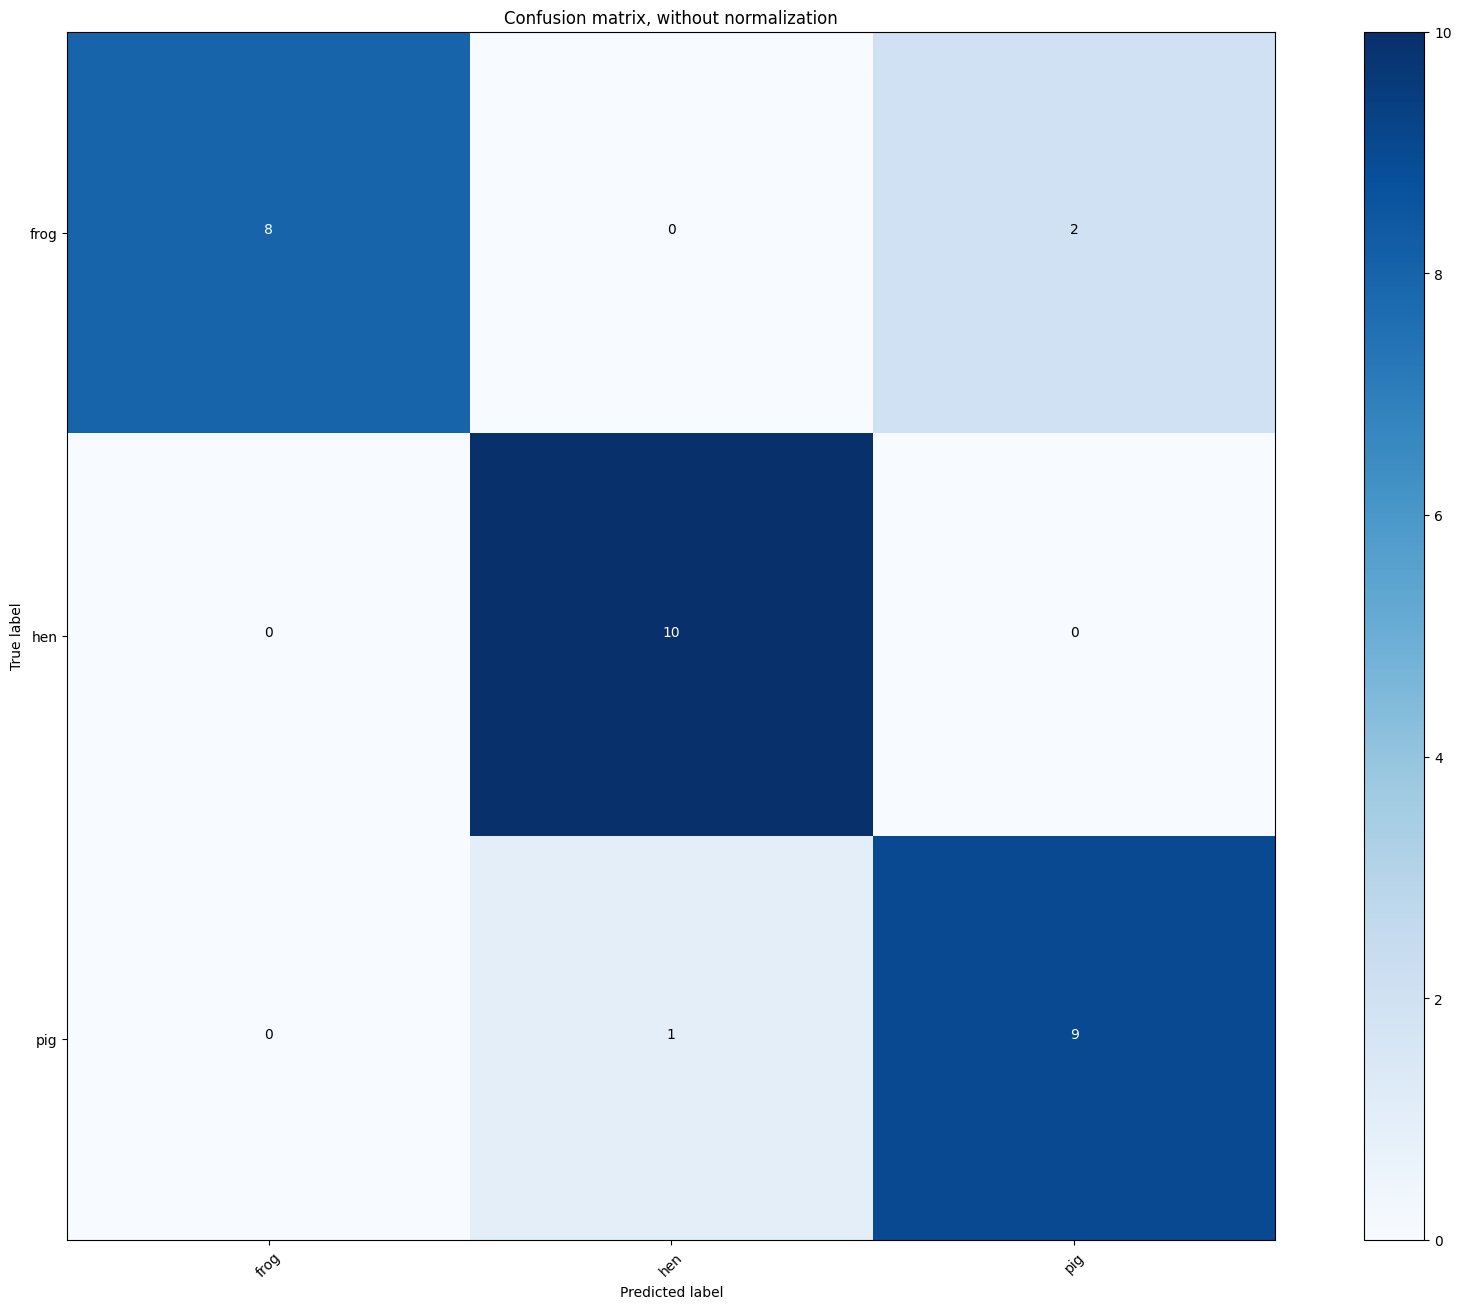

In [63]:
# Plot non-normalized confusion matrix
plt.figure(figsize=(18,13))
plot_confusion_matrix(cnf_matrix, classes=labelencoder.classes_,
                      title='Confusion matrix, without normalization')

In [64]:
# Find wrong predicted samples indexes
#wrong_predictions = [i for i, (e1, e2) in enumerate(zip(test_classes, predicted_labels)) if e1 != e2]
wrong_predictions = [i for i, (e1, e2) in enumerate(zip(predicted_labels,test_classes)) if e1 != e2]

In [65]:
# Find wrong predicted audio files
print(np.array(labels)[test_index[wrong_predictions]])
print(predicted_labels[wrong_predictions].T)
print(labelencoder.inverse_transform(predicted_labels[wrong_predictions]))
print(np.array(files)[test_index[wrong_predictions]])

['frog' 'pig' 'frog']
[2 1 2]
['pig' 'hen' 'pig']
['audio\\frog\\train\\3-102908-A-4.wav'
 'audio\\pig\\train\\5-103418-A-2.wav'
 'audio\\frog\\train\\2-52789-A-4.wav']
